# Climate Change Belief Analysis
#### by Team_SS4_JHB_First_Class on {29/06}

# Introduction 
Several companies are built around lessening one’s environmental impact or carbon footprint. This is because they offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, we have created a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data. This model together will the accompanying app will help Geo-Environmental Consultation companies who are turning to social media to obtain valuable information about job applicants and to monitor the activities of their employees in relation to the values they have towards the company's projects and beliefs surrounding the ever changing global environment.

Providing an accurate and robust solution to this task will provide access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies. The app launched on **streamlit** is also an intuitive, easy to use, simple and the customer can rely on the product it.

# Table of Contents

1. Intro to Comet
2. Importing Libraries
3. Importing Dataset
4. Data Preprocessing
5. Exploratory Data Analysis
6. Feature Engineering and Selection
7. Model Selection 
8. Model Evaluation
9. References

## Comet

Comet is a great tool for model versioning and experimentation as it records the parameters and conditions from each of the experiements- allowing for reproducing of results, or going back to a previous version of the experiment.

In [ ]:
!pip install comet_ml

In [ ]:
# Loading in the comet_ml tool
#from comet_ml import Experiment
    
# Setting the API key, saved as environment variable
# experiment = Experiment(api_key="9gsTl4Wv73PDkYEoX8PUt5RSX",
#                       project_name="nlp-predict-first-class", workspace="ms-noxolo")
# experiment.display()

# Importing Libraries

In [48]:
# Importing modules for data science and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 180
# NLP Libraries
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import pos_tag
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install nlppreprocess

# Importing dataset

In [49]:
# Loading in the datasets
train = pd.read_csv("/kaggle/input/climate-change-belief-analysis/train.csv")
test = pd.read_csv("/kaggle/input/climate-change-belief-analysis/test.csv")
sample_submission = pd.read_csv('/kaggle/input/climate-change-belief-analysis/sample_submission.csv')

# Data Preprocessing

## Summary Statistics

In [50]:
# Looking at the first few entries in the dataset
train.head()

sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT @RawStory: Researchers say we have three ye...   698562
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954

In [51]:
# Shape of the dataset
train.shape

(15819, 3)

In [52]:
# dataframe information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [53]:
# Looking at the numbers of possible classes in our sentiment
train['sentiment'].unique()

array([ 1,  2,  0, -1])

In [54]:
# Looking at the how the messages are distributed across the sentiment
train.describe()

sentiment        tweetid
count  15819.000000   15819.000000
mean       0.917504  501719.433656
std        0.836537  289045.983132
min       -1.000000       6.000000
25%        1.000000  253207.500000
50%        1.000000  502291.000000
75%        1.000000  753769.000000
max        2.000000  999888.000000

## Missing values

In [55]:
# Checking for missing values
train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

Fortunately, there are no missing values in our dataset.

In [56]:
# Checking whether a character is white-space character or not
print(len(train['message']))
print(sum(train['message'].apply(lambda x: x.isspace())))

15819
0


In [57]:
# Sample tweet
tweet = train.iloc[6,1]
print(tweet)

RT @thenation: Mike Pence doesn’t believe in global warming or that smoking causes lung cancer. https://t.co/gvWYaauU8R


Text(0.5, 1.0, 'Distribution of target labels')

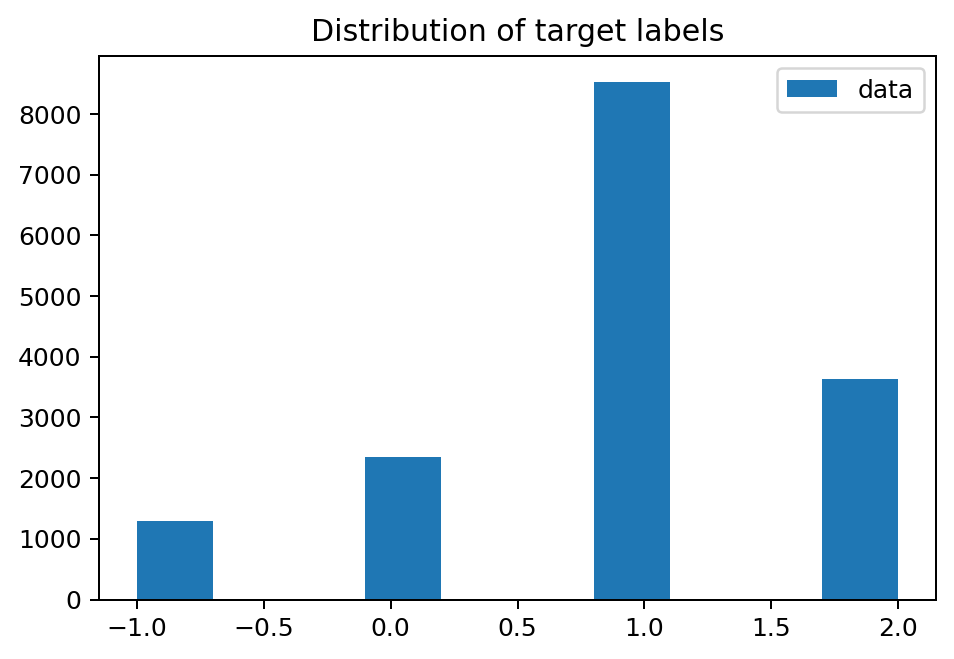

In [58]:
# Visualizing the distribution of the target 
plt.hist(train['sentiment'], label='data');
plt.legend();
plt.title('Distribution of target labels')

It is notable that there is an imbalance of classes in the daset  and these tend to be a common problem in machine learning classification where there are a disproportionate ratio of observations in each class. This is can cause problems as most algorithms are designed to maximize accuracy and reduce error. Therefore we ill address and take care of the class imbalance in our EDA

Text(0, 0.5, 'Density')

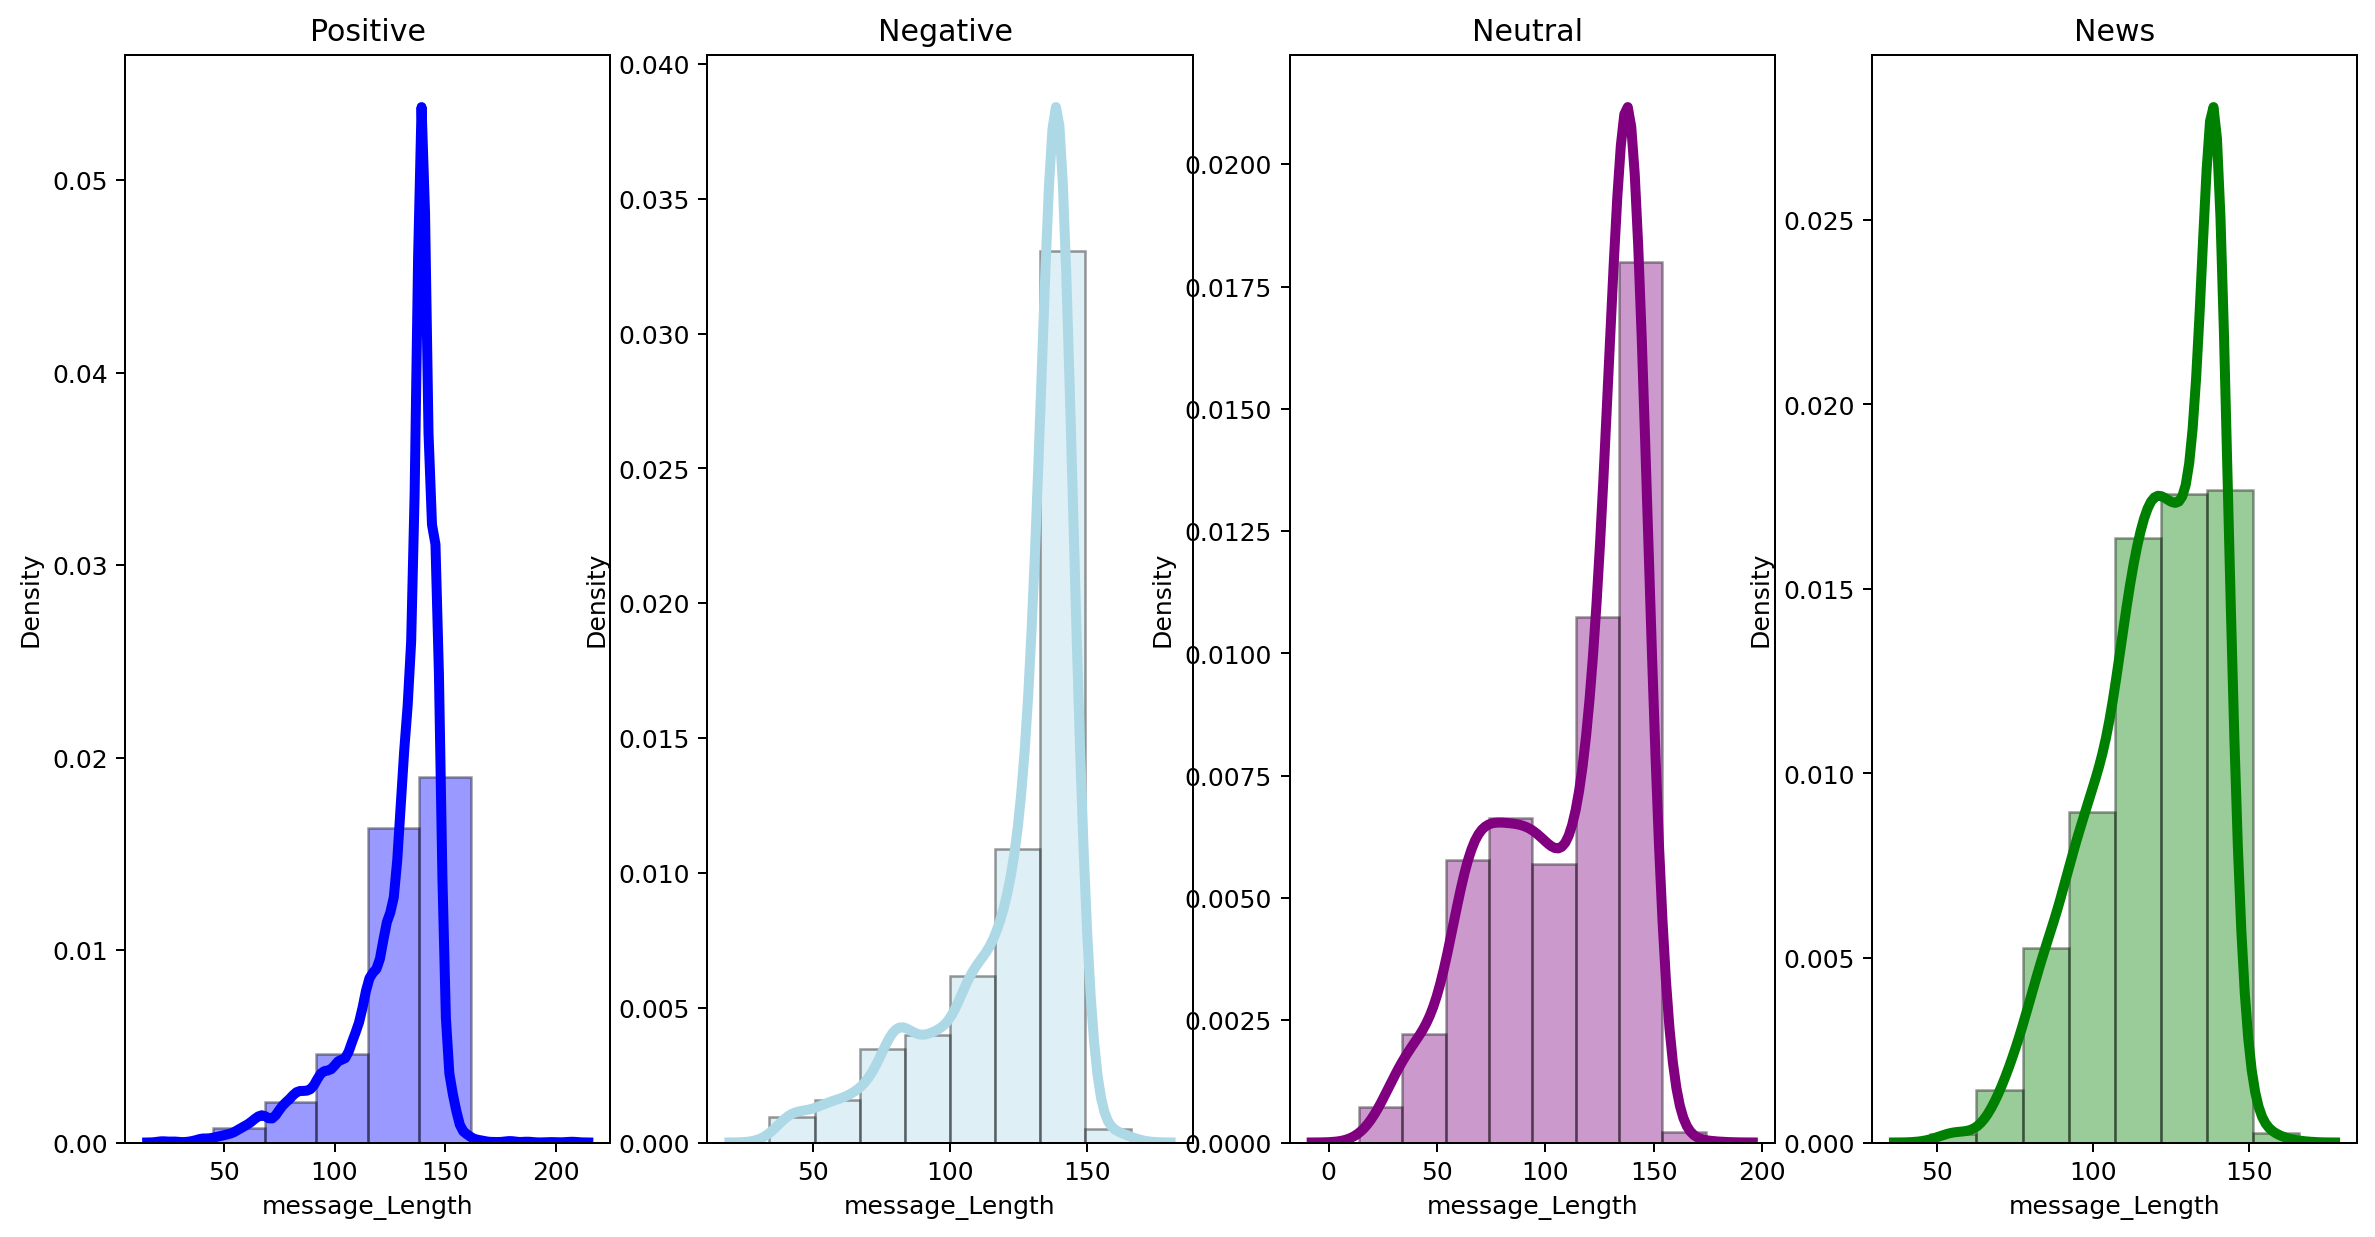

In [59]:
# Distribution plots for the label
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(16,8))

#For Positive 
sns.distplot(train[train['sentiment']==1]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'blue', 
             ax = ax1,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax1.set_title('Positive')
ax1.set_xlabel('message_Length')
ax1.set_ylabel('Density')

#For Negative 
sns.distplot(train[train['sentiment']==-1]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'lightblue', 
             ax = ax2,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax2.set_title('Negative ')
ax2.set_xlabel('message_Length')
ax2.set_ylabel('Density')

#For Neutral 
sns.distplot(train[train['sentiment']==0]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'purple',  
             ax = ax3,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax3.set_title('Neutral ')
ax3.set_xlabel('message_Length')
ax3.set_ylabel('Density')

#For Neews
sns.distplot(train[train['sentiment']==2]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'green', 
             ax = ax4,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax4.set_title('News')
ax4.set_xlabel('message_Length')
ax4.set_ylabel('Density')

The average length of messages for all sentiments is not suprising as a tweet is only limited to 140 characters. However, the density contrast between positive and negative sentiments is interesting and will make for more unpacking later in the EDA. Now that we have explored our dataset, we can begin perfoming some analyses on it.

# Exploratory Data Analysis

 We need to perform investigative and detective analysis on our data to see if we can unearth any useful insights. We have data being generated from tweets, digital media platforms, blogs, and a whole host of other sources, in this case, tweets, and s a data scientists and NLP enthusiasts, it’s important to utilize Exploratory Data Analysis to analyze all this text data, with the aid of Visuals to help organizations make data-driven decisions.

In [60]:
working_df = train.copy()
# Labeling the target
working_df['sentiment'] = [['Negative', 'Neutral', 'Positive', 'News'][x+1] for x in working_df['sentiment']]

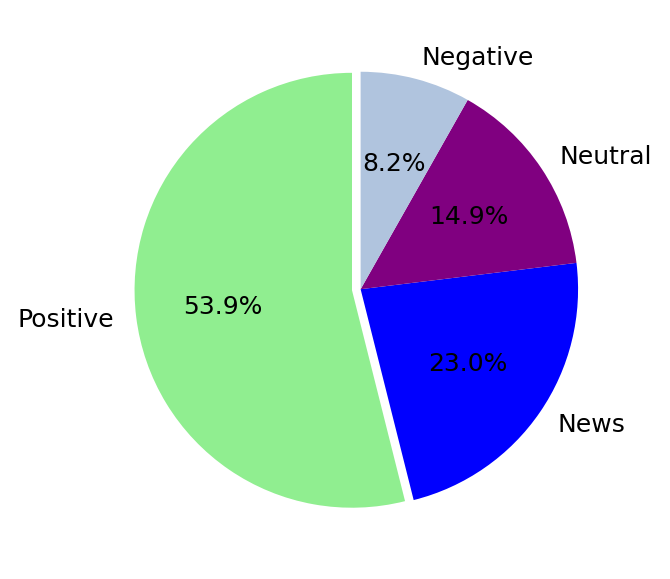

In [61]:
# checking the numerical distribution
values = working_df['sentiment'].value_counts()/working_df.shape[0]
labels = (working_df['sentiment'].value_counts()/working_df.shape[0]).index
colors = ['lightgreen', 'blue', 'purple', 'lightsteelblue']
plt.pie(x=values, labels=labels, autopct='%1.1f%%', startangle=90, explode= (0.04, 0, 0, 0), colors=colors)
plt.show()

The Pie-Chart Above shows that more than 50% of the tweet sample has positive sentiments about Climate Change. Tweets with negative Sentiments are the least. 
The news are also actively engaged on Climate Change as well, as we can see that they are the second popular.

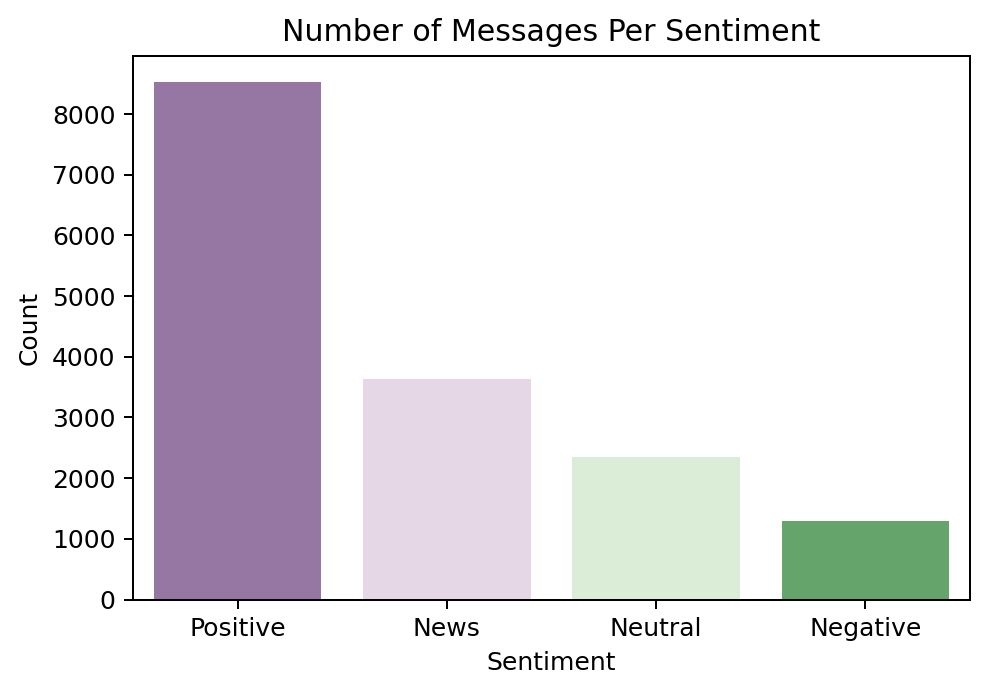

In [62]:
sns.countplot(x='sentiment' ,data = working_df, palette='PRGn')
plt.ylabel('Count')
plt.xlabel('Sentiment')
plt.title('Number of Messages Per Sentiment')
plt.show()

In perspective, there are more than 8000 Positive tweets, and the news, being the second largest, has less than 4000 tweets. 
Negative tweets account for less than 20% of the Positive tweets. 

This clear imbalance of classes in the daset can lead to a disproportionate ratio of observations in each class, causing problems as most algorithms are designed to maximize accuracy and reduce error. As a result, those models may perform best at predicting Positive sentiments, but poorly at predicting Negative sentiments, for example, because of the high imbalance.
We therefore continue to analyse and evaluate for more insights to be derived from the dataset as we prepared to balance later on in the analysis.

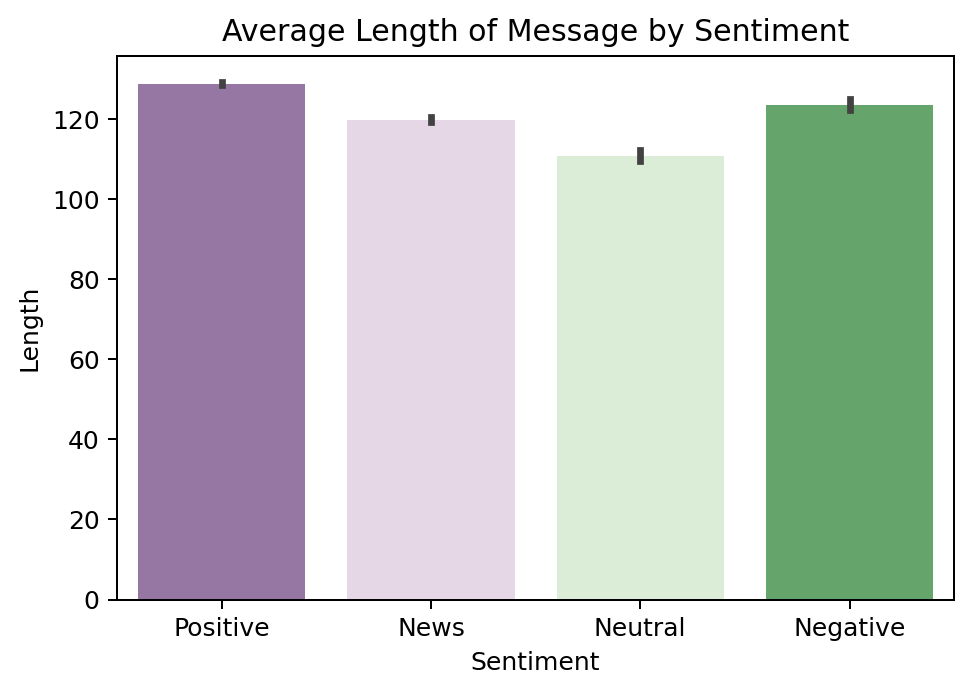

In [63]:
# Visualizing text lengths for each sentiment
sns.barplot(x='sentiment', y=working_df['message'].apply(len) ,data = working_df, palette='PRGn')
plt.ylabel('Length')
plt.xlabel('Sentiment')
plt.title('Average Length of Message by Sentiment')
plt.show()

Here we see that both negative postive tweets have roughly the highest average length of tweets, with Positive having a slightly higher average

Now we will whether a tagged user has any relation to the sentiment, and which users are most popular in each sentiment

In [64]:
# Extracting Users in a column
working_df['users'] = [''.join(re.findall(r'@\w{,}', line)) 
                       if '@' in line else np.nan for line in working_df.message]

In [65]:
# Generating Counts of users
counts = working_df[['message', 'users']].groupby('users', as_index=False).count().sort_values(by='message', ascending=False)

In [66]:
# Top 5 most popular
counts.head()

users  message
3410  @StephenSchlegel      307
3270       @SenSanders      243
6182  @realDonaldTrump      143
448     @BernieSanders      121
612               @CNN      106

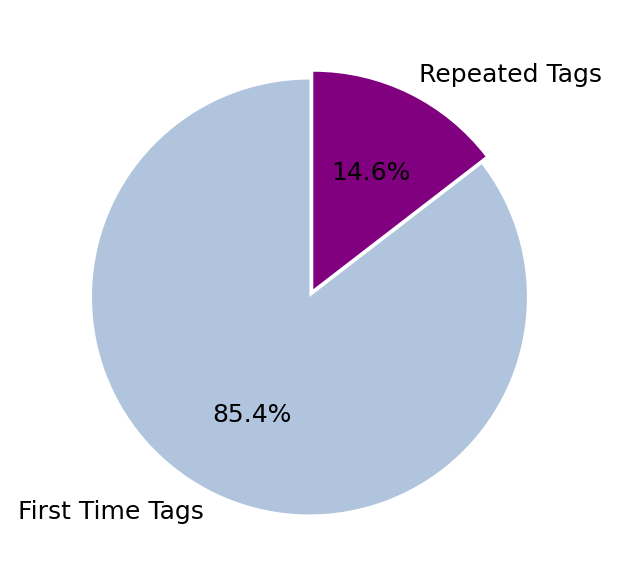

In [67]:
# checking the numerical distribution
values = [sum(np.array(counts['message']) == 1)/len(counts['message']), sum(np.array(counts['message']) != 1)/len(counts['message'])]
labels = ['First Time Tags', 'Repeated Tags']
colors = ['lightsteelblue', "purple"]
plt.pie(x=values, labels=labels, autopct='%1.1f%%', startangle=90, explode= (0.04, 0), colors=colors)
plt.show()

14.6% of the tweets are certain users tagged more than once. Considering that we are dealing with highly imbalanced data, 14.6% is significant. Depending on how influential the tagged users are, they may account for more a further portion of the data. 
Knowing who is tagged on a tweet may increase the chance of the model predict the correct sentiment of the tweet.

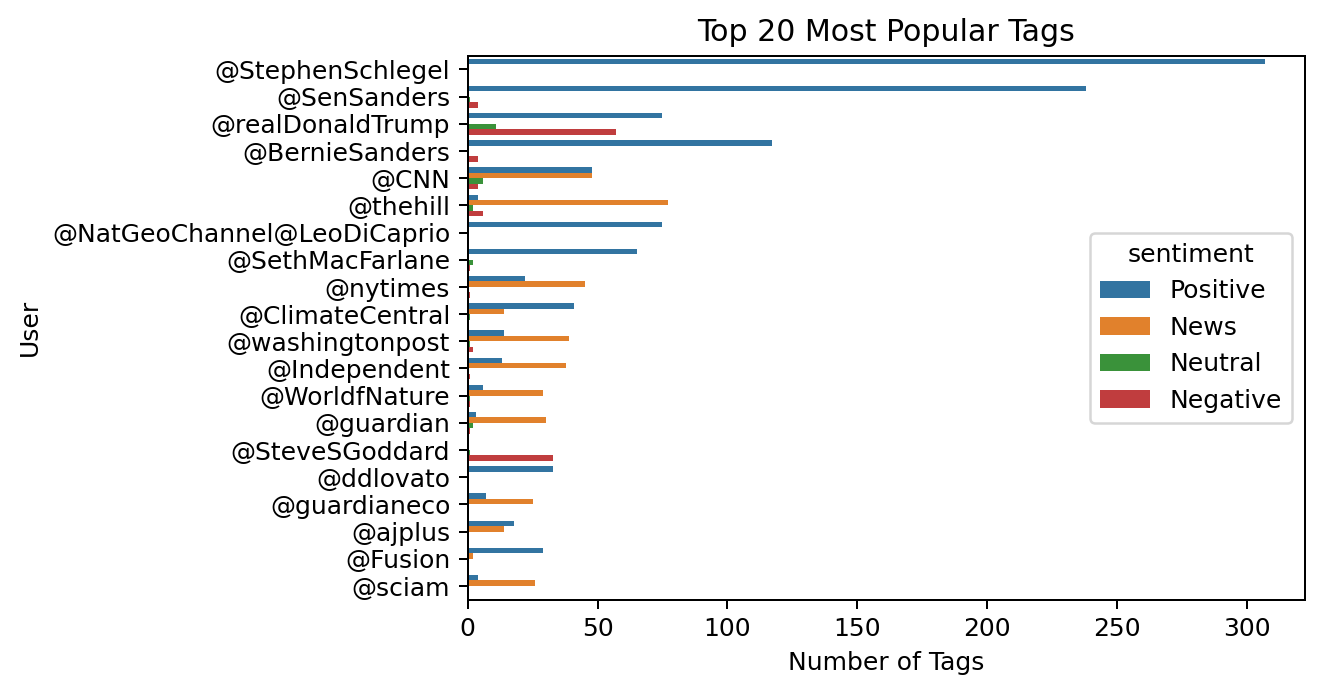

In [68]:
# Analysis of most popular tags, sorted by populariy
sns.countplot(y="users", hue="sentiment", data=working_df, palette='PRGn',
              order=working_df.users.value_counts().iloc[:20].index) 

plt.ylabel('User')
plt.xlabel('Number of Tags')
plt.title('Top 20 Most Popular Tags')
plt.show()
#plt.xticks(rotation=90)

Without surprise, we are able to notice certain tags are commonly associated with a specific sentiment. 
There are some tags which are mojorly strongly associated with one sentiment. 
Keeping these users will aid the machine learning process. We also notice well known american politicians strongly associated with either side. An interesting thing is that one was Liberal and the other, conservative as of the time of the tweets and now. 
We notice also that some of the news platforms have positive sentiments concerning Climate Change. 

Now that we've had a look at the tweets themselves as well as the users, we now analyse the hastags:

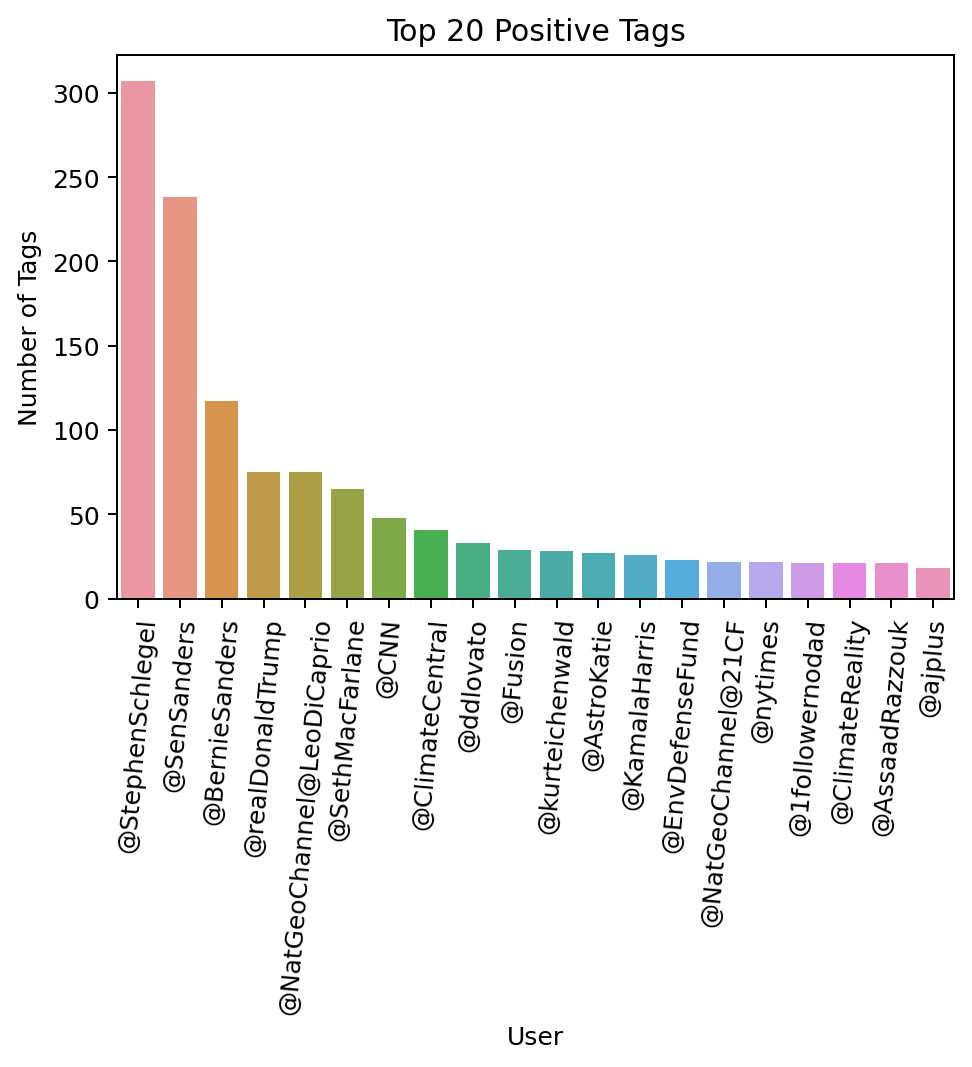

In [69]:
# Analysis of most popular tags, sorted by populariy
sns.countplot(x="users", data=working_df[working_df['sentiment'] == 'Positive'],
              order=working_df[working_df['sentiment'] == 'Positive'].users.value_counts().iloc[:20].index) 

plt.xlabel('User')
plt.ylabel('Number of Tags')
plt.title('Top 20 Positive Tags')
plt.xticks(rotation=85)
plt.show()

In reality, @SenSanders and @BernieSanders are the same person, this therefore means that tags associated with this tag are the most, in the positive sentiment repeated tags. 
It is no surprise to see NationalGeo and "ClimateCentral" of course... Climate Change. 

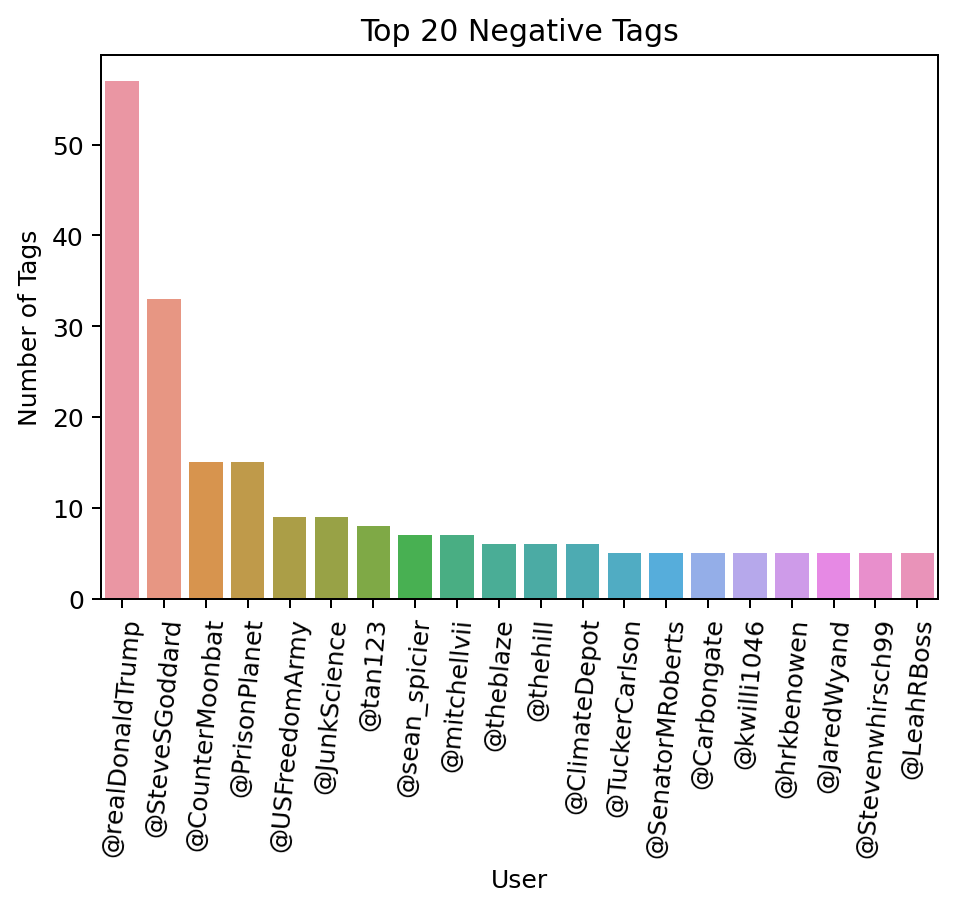

In [70]:
# Analysis of most popular tags, sorted by populariy
sns.countplot(x="users", data=working_df[working_df['sentiment'] == 'Negative'],
              order=working_df[working_df['sentiment'] == 'Negative'].users.value_counts().iloc[:20].index) 

plt.xlabel('User')
plt.ylabel('Number of Tags')
plt.title('Top 20 Negative Tags')
plt.xticks(rotation=85)
plt.show()

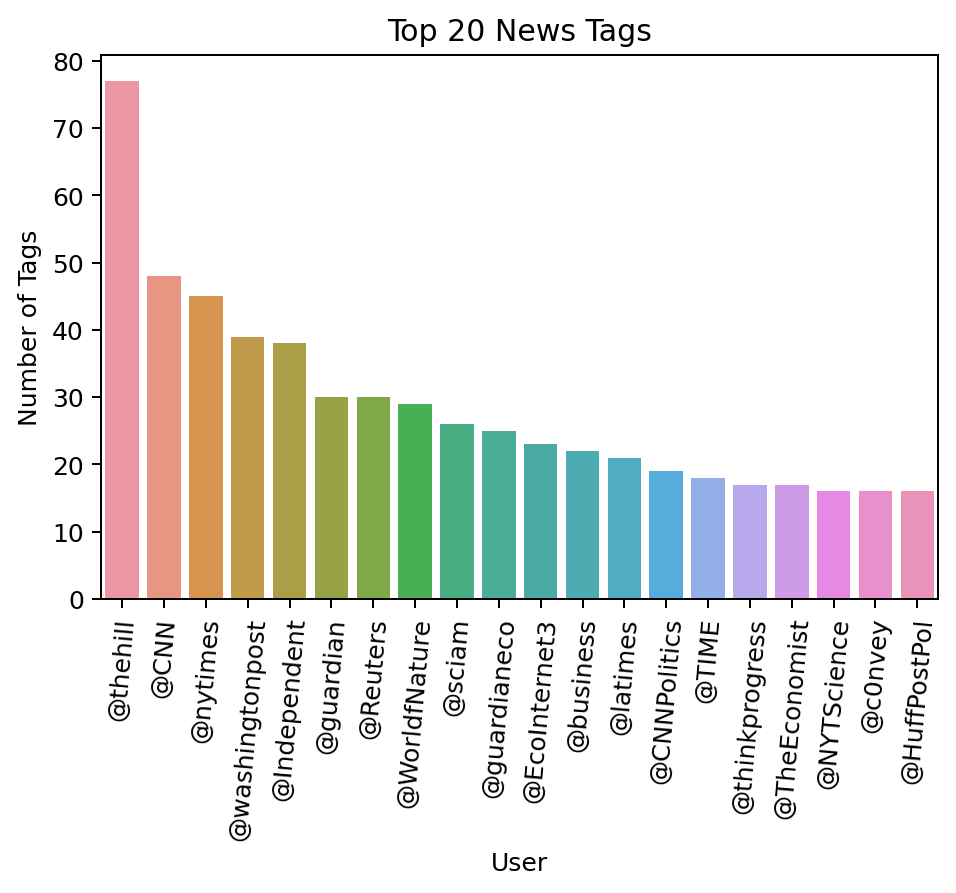

In [71]:
# Analysis of most popular tags, sorted by populariy
sns.countplot(x="users", data=working_df[working_df['sentiment'] == 'News'],
              order=working_df[working_df['sentiment'] == 'News'].users.value_counts().iloc[:20].index) 

plt.xlabel('User')
plt.ylabel('Number of Tags')
plt.title('Top 20 News Tags')
plt.xticks(rotation=85)
plt.show()

The count of negative sentiments by a single tag is much less that that of the positive sentiments. 
On the positive sentiments, the threshhold count, was above 300, while on the negative, it is less than 60. 
However, we can see that the most popular tag associated with negative tweets at this time, was the President(now) of the U.S.A. 

## Data Cleaning

Cleaning is the process of detecting and correcting corrupt or inaccurate records from the dataset and identifying incomplete, incorrect, inaccurate or irrelevant parts of the data. We also apply database normalization which is the process of structuring a relational database in accordance with a series of normal forms in order to reduce data redundancy. Applying it will aslo help improve data integrity as it entails organizing the attributes of a dataset to ensure that their dependencies are properly enforced by database integrity constraints. Stemming and Lemmatization are techniques in the field of Natural Language Processing that are used to prepare text, words, and documents for further processing.



A stemmer will return the stem of a word, which needn't be identical to the morphological root of the word. It usually sufficient that related words map to the same stem,even if the stem is not in itself a valid root, while in lemmatisation, it will return the dictionary form of a word, which must be a valid word.

In [72]:
# Testing the PorterStemmer 
stemmer = PorterStemmer()
print("The stemmed form of typing is: {}".format(stemmer.stem("typing")))
print("The stemmed form of types is: {}".format(stemmer.stem("types")))
print("The stemmed form of type is: {}".format(stemmer.stem("type")))

The stemmed form of typing is: type
The stemmed form of types is: type
The stemmed form of type is: type


In lemmatisation, the part of speech of a word should be first determined and the normalisation rules will be different for different part of speech, while the stemmer operates on a single word without knowledge of the context, and therefore cannot discriminate between words which have different meanings depending on part of speech.

In [73]:
# Testing Lemmatization
lemm = WordNetLemmatizer()
print("In  case of Lemmatization, typing is: {}".format(lemm.lemmatize("typing")))
print("In  case of Lemmatization, types is: {}".format(lemm.lemmatize("types")))
print("In  case of Lemmatization, type is: {}".format(lemm.lemmatize("type")))

In  case of Lemmatization, typing is: typing
In  case of Lemmatization, types is: type
In  case of Lemmatization, type is: type


We will also need to also transform some of the messages into a more digestible form and keeping words and items that ar otherwise discarded. We will carry out this process using the nlp tool below.

In [74]:
from nlppreprocess import NLP
nlp = NLP()
nlp.process('shouldnt')

'should not'

In [75]:
nlp.process('There is no good here')

'There no good'

The following function is an important step in the data mining process. In our case of classification, preprocessing data means; Data cleaning, Fill in missing values, smoothing noisy data and resolving any existing inconsistencies. Success in the steps will then make it possible and some-what easy for us to perform Data integration, Data transformation, Normalization and aggregation as well as Data reduction.

In [76]:
# Data cleaning for furthur sentiment analysis

def cleaner(line):
    '''
    For preprocessing the data, we regularize, transform each upper case into lower case, tokenize,
    normalize and remove stopwords. Normalization transforms a token to its root word i.e. 
    These words would be transformed from "love loving loved" to "love love love."
    
    '''

    # Removes RT, url and trailing white spaces
    line = re.sub(r'^RT ','', re.sub(r'https://t.co/\w+', '', line).strip()) 
    emojis = re.compile("["
                           u"\U0001F600-\U0001F64F"  # removes emoticons,
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

    line = emojis.sub(r'', line)

    # Removes puctuation
    punctuation = re.compile("[.;:!\'’‘“”?,\"()\[\]]")
    tweet = punctuation.sub("", line.lower()) 
    # Removes stopwords
    nlp_for_stopwords = NLP(replace_words=True, remove_stopwords=True, 
                            remove_numbers=True, remove_punctuations=False) 
    tweet = nlp_for_stopwords.process(tweet) # This will remove stops words that are not necessary. The idea is to keep words like [is, not, was]
    # https://towardsdatascience.com/why-you-should-avoid-removing-stopwords-aa7a353d2a52

    # tokenisation
    # We used the split method instead of the word_tokenise library because our tweet is already clean at this point
    # and the twitter data is not complicated
    tweet = tweet.split() 
    # POS 
    # Part of Speech tagging is essential for Lemmatization to perform well
    pos = pos_tag(tweet)
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tweet = ' '.join([lemmatizer.lemmatize(word, po[0].lower()) 
                      if (po[0].lower() in ['n', 'r', 'v', 'a'] and word[0] != '@') else word for word, po in pos])
    return tweet

In [77]:
text1 = cleaner(tweet)
print('BEFORE')
print(tweet, '\n'*2)
print('AFTER')
print(text1)
# In the tweet below, you can see that "not" was added and kept, because the word is significant

BEFORE
RT @thenation: Mike Pence doesn’t believe in global warming or that smoking causes lung cancer. https://t.co/gvWYaauU8R 


AFTER
@thenation mike penny not believe in global warming smoking cause lung cancer


In [78]:
cleaned = train['message'].apply(cleaner)

In [79]:
cleaned.head()

0    polyscimajor epa chief not think carbon dioxid...
1    its not like we lack evidence anthropogenic gl...
2    @rawstory researcher say we three year act cli...
3    #todayinmaker# wire pivotal year in war climat...
4    @soynoviodetodas its and racist sexist climate...
Name: message, dtype: object

In [80]:
working_df['clean'] = cleaned

Having Cleaned the data, we can now explore which words are most common from which sentiment of tweets. 
We will do this using WordClouds.

In [81]:
# Combining all the messages
text_before_cleaning = " ".join(tweet for tweet in train['message'])
text_after_cleaning = " ".join(tweet for tweet in cleaned)

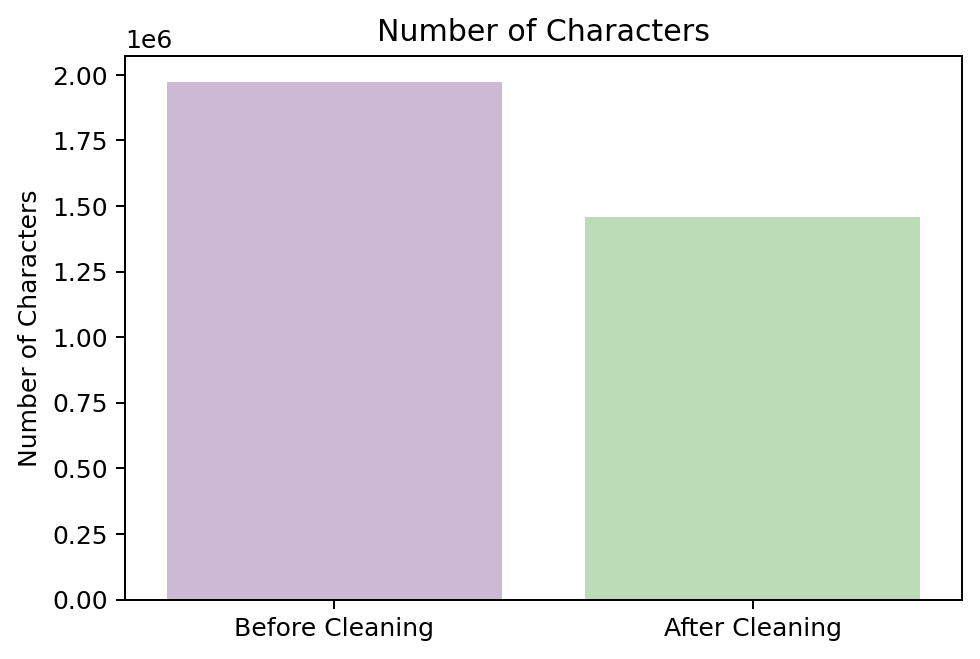

In [82]:
# Numbers of characters
sns.barplot(x=['Before Cleaning', 'After Cleaning'], y=[len(text_before_cleaning), len(text_after_cleaning)], palette='PRGn')
# sns.countplot(x=[] ,data = working_df, palette='PRGn')
plt.ylabel('Number of Characters')
# plt.xlabel('Sentiment')
plt.title('Number of Characters')
plt.show()

In perspective, we have rid the data of more than 1.5 million unnecessary characters. This will certainly have a positive effect on the efficiency of our model.

Word clouds are a simple visualization of data, in which words are shown in varying sizes depending on how often they appear. The kind of insight they provide even without much analysis being done helps in data normalization and in also what to expect as we dive deeper into data analysis. In our case, it is no surprise that both "climate change" and "global warming" as the biggest words in the could. Some other big words include "https" and "RT" which can be easily categorized as potential stopwords.

# Common Words in All the Tweets

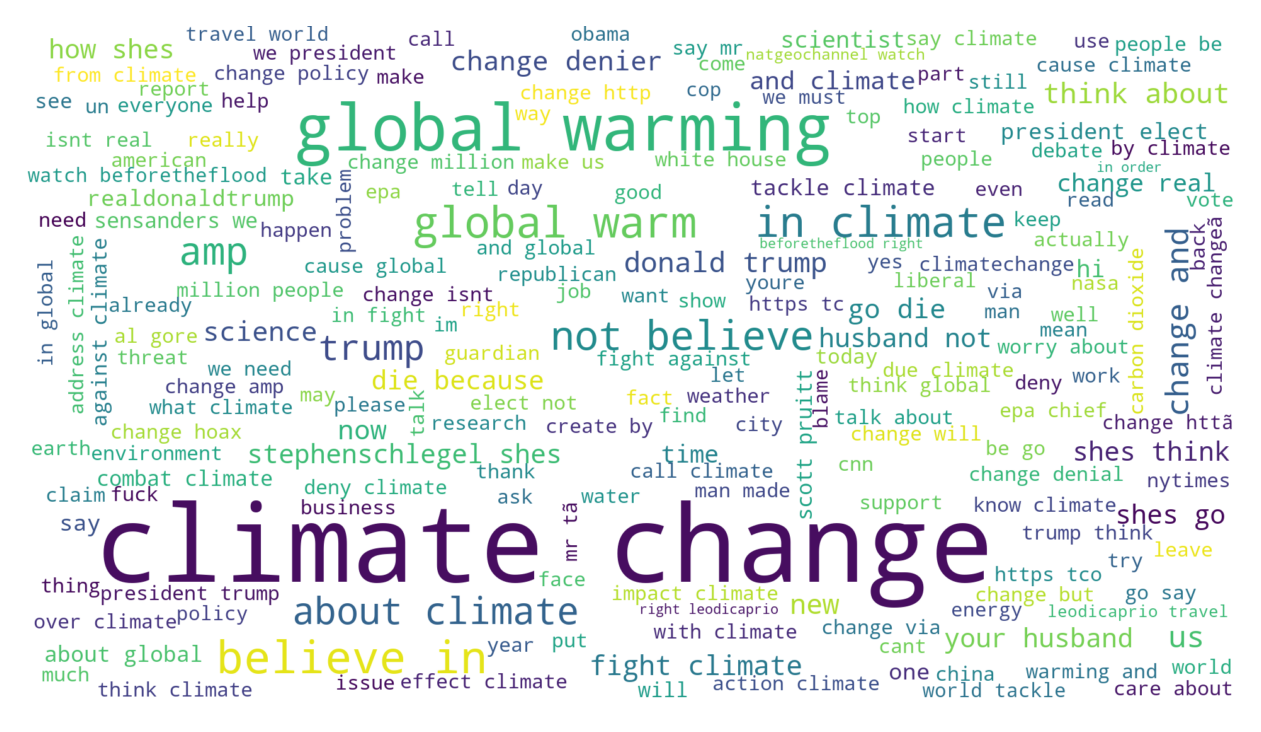

In [83]:
# Generating the word cloud image from all the messages
wordcloud = WordCloud(font_path='../input/droidsansmonottf/droidsansmono.ttf', background_color="white",
                      width = 1920, height = 1080, colormap="viridis").generate(text_after_cleaning)

# Displaying the word cloud image:
# using matplotlib way:
plt.figure(dpi=260)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Of course, the most popular words in all the tweets are, "Climate Change" and "Global Warming". 
We see also, the phases "believe in" and  "not believe". And these two phrases capture the reason of this project. 
The efficiency and relevance of our preprocessing function is now shining in being able to keep what may normally be stop words in English, that is, 'not' and 'in'. 

# Common Words in Positive Tweets

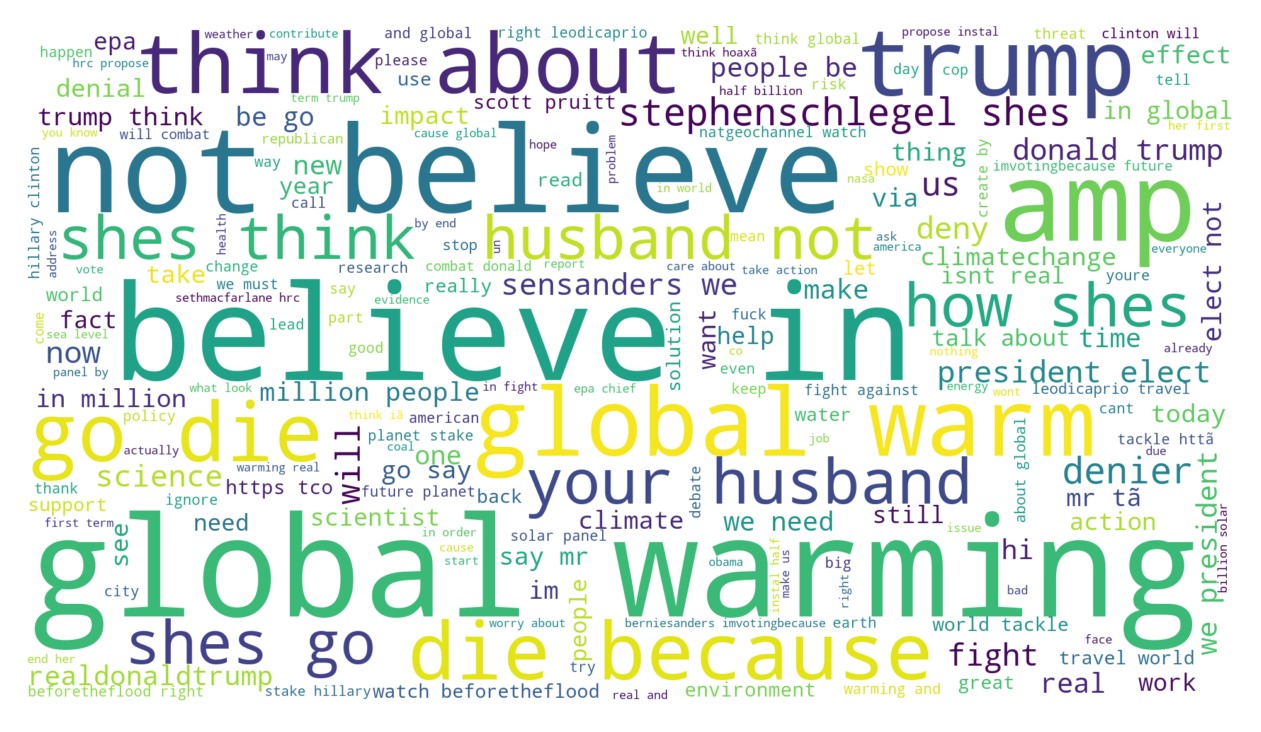

In [84]:
# Wordcloud for the cleaned data:Positive sentiment
corpus = re.sub("climate change", ''," ".join(tweet.strip() for tweet in working_df['clean'][working_df['sentiment'] == 'Positive']))
wordcloud = WordCloud(font_path='../input/droidsansmonottf/droidsansmono.ttf', background_color="white",
                      width = 1920, height = 1080, colormap="viridis").generate(corpus)

# Displaying the word cloud using matplotlib:
# plt.title("General Word Cloud")
plt.figure(dpi=260)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

It seems that positive sentiments may be trying to convince often with the use of words like "believe" in and "not believe". 
Someone's husband is strangely very popular. The president elect at this time, was Donald Trump, whom we have seen his popularity in negative tweets. 

# Common Words in Negative Tweets

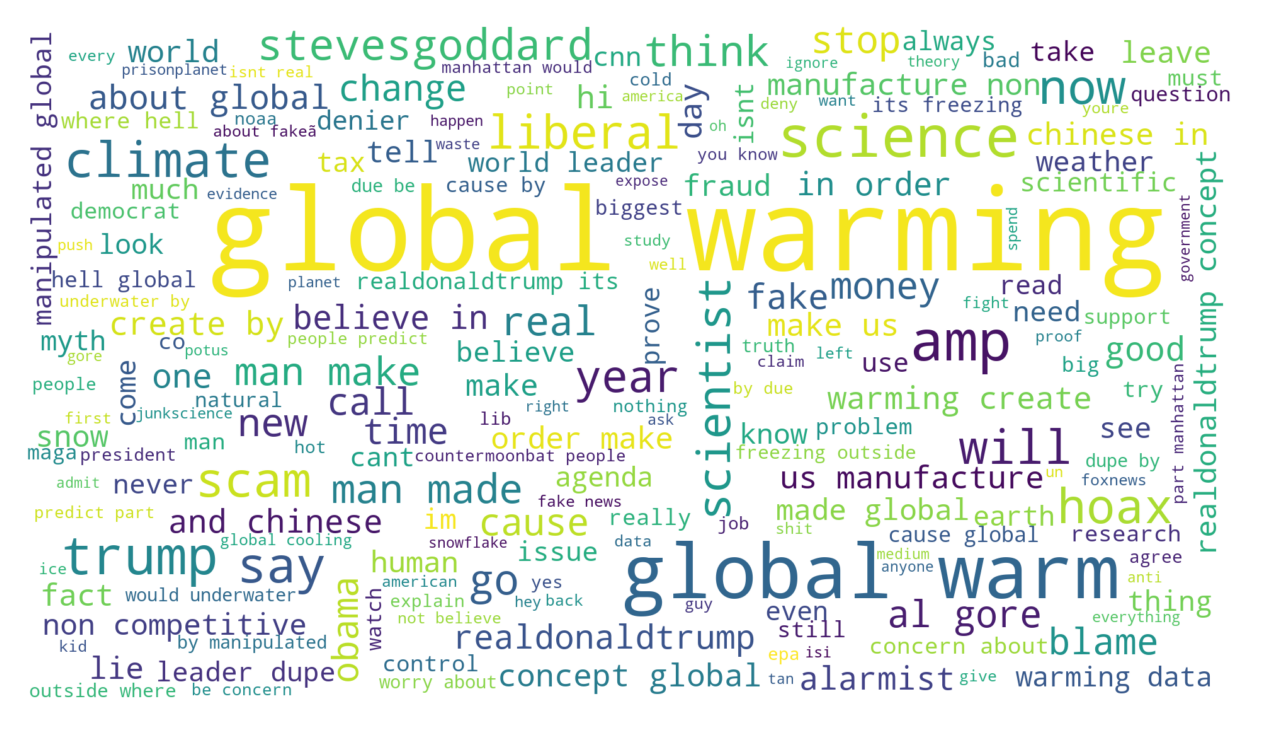

In [85]:
# Wordcloud for the cleaned data:Negative sentiment
corpus = re.sub("climate change", ''," ".join(tweet.strip() for tweet in working_df['clean'][working_df['sentiment'] == 'Negative']))
wordcloud = WordCloud(font_path='../input/droidsansmonottf/droidsansmono.ttf', background_color="white",
                      width = 1920, height = 1080, colormap="viridis").generate(corpus)

# Displaying the word cloud image:
# plt.title("General Word Cloud")
plt.figure(dpi=260)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

We see that in the negative sentiment tweets, the common words beside "Global Warming" are "Science", "man made", "Fraud", "Lie", "Hoax" and "Fake" amongst others. Words some of which ARE actually associated with negative sentiment in general. 

# Common Words in News

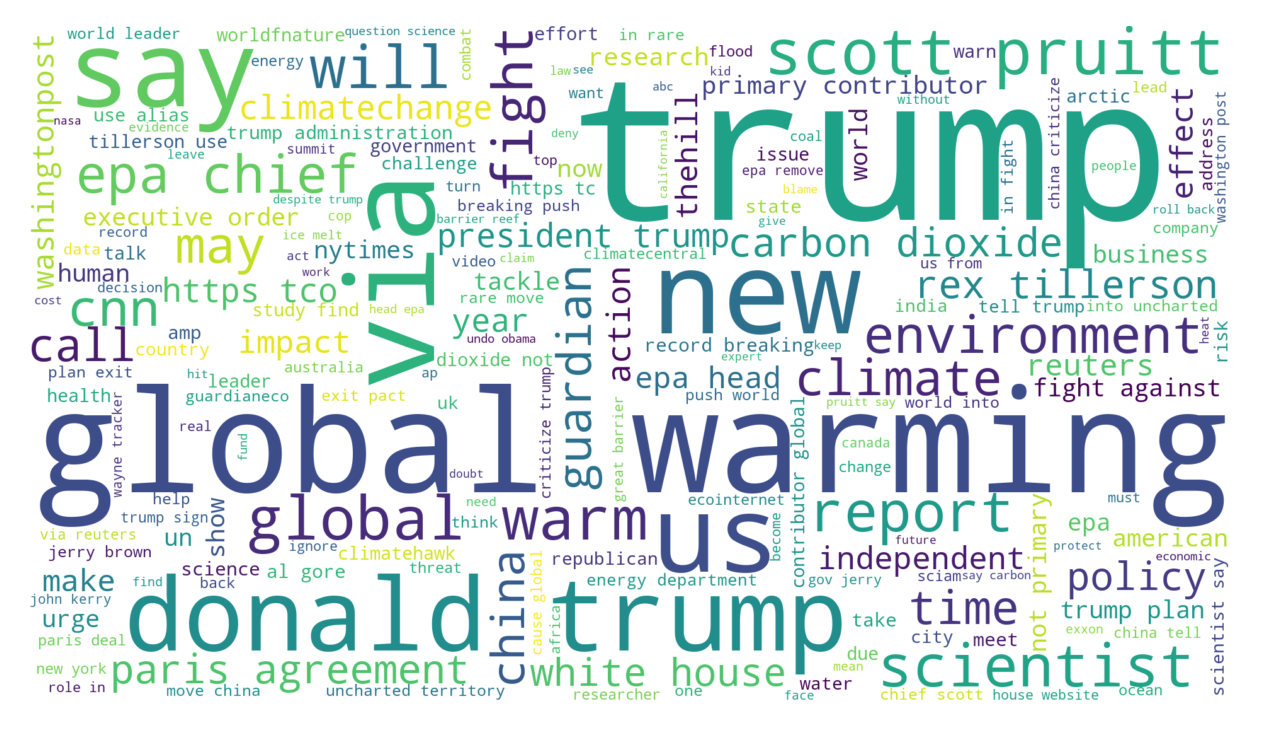

In [92]:
# Wordcloud for the cleaned data:News
corpus = re.sub("climate change", ''," ".join(tweet.strip() for tweet in working_df['clean'][working_df['sentiment'] == 'News']))
wordcloud = WordCloud(font_path='../input/droidsansmonottf/droidsansmono.ttf', background_color="white",
                      width = 1920, height = 1080, colormap="viridis").generate(corpus)

# Displaying the word cloud image:
# plt.title("General Word Cloud")
plt.figure(dpi=260)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

It makes sense why the most popular name in the news is Donald Trump as this was election year. Much of the words in the news are politically associated with climate change. 

"The Paris Agreement is a landmark environmental accord that was adopted by nearly every nation in 2015 to address climate change and its negative impacts. The deal aims to substantially reduce global greenhouse gas emissions in an effort to limit the global temperature increase in this century to 2 degrees Celsius above preindustrial levels, while pursuing means to limit the increase to 1.5 degrees." - NRDC

# What Hashtags were Trending?

In [93]:
# Creating a column of hastags
working_df['hashtags'] = [' '.join(re.findall(r'#\w{,}', line)) 
                       if '#' in line else np.nan for line in working_df.message]

In [94]:
# A sneak peak of these tweets plus hashtags
working_df.head()

sentiment                                            message  tweetid  \
0  Positive  PolySciMajor EPA chief doesn't think carbon di...   625221   
1  Positive  It's not like we lack evidence of anthropogeni...   126103   
2      News  RT @RawStory: Researchers say we have three ye...   698562   
3  Positive  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4  Positive  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   

              users                                              clean  \
0         @mashable  polyscimajor epa chief not think carbon dioxid...   
1               NaN  its not like we lack evidence anthropogenic gl...   
2         @RawStory  @rawstory researcher say we three year act cli...   
3               NaN  #todayinmaker# wire pivotal year in war climat...   
4  @SoyNovioDeTodas  @soynoviodetodas its and racist sexist climate...   

          hashtags  
0              NaN  
1              NaN  
2              NaN  
3  #TodayinMaker #  
4   #ElectionNight

A visual represenation of the hashtags using word clouds

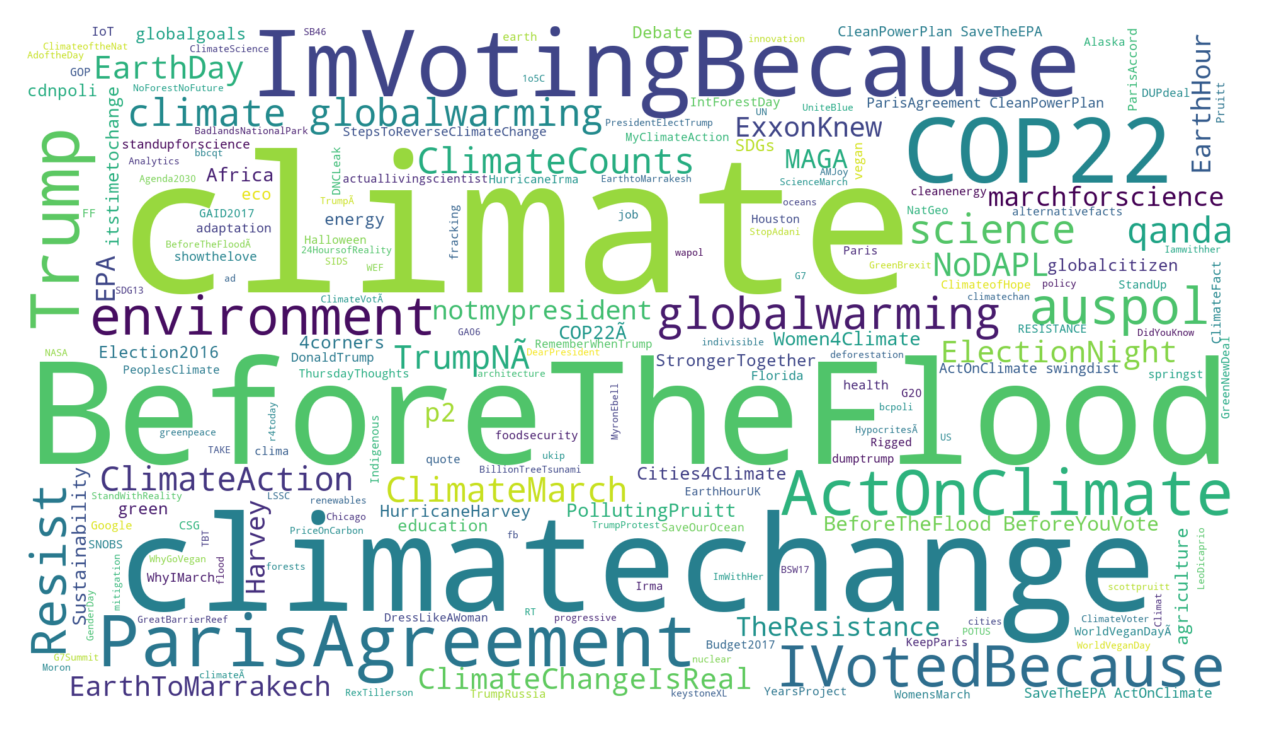

In [89]:
# Creating a wordcloud of the hashtags: Positive sentiment
corpus = re.sub("climate change", ''," ".join(tweet.strip() for tweet in working_df['hashtags'][working_df['sentiment'] == 'Positive'] if type(tweet) == str))
wordcloud = WordCloud(font_path='../input/droidsansmonottf/droidsansmono.ttf', background_color="white",
                      width = 1920, height = 1080, colormap="viridis").generate(corpus)

# Displaying the word cloud image:
plt.figure(dpi=260)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

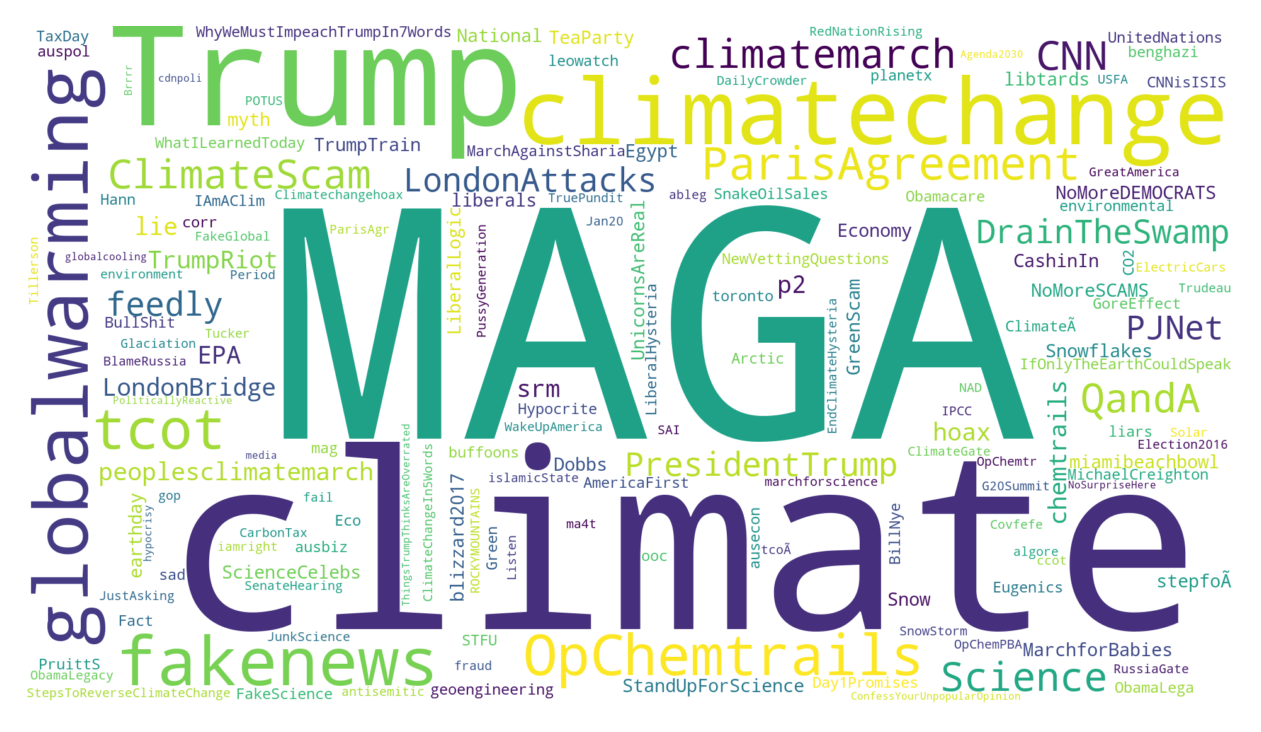

In [90]:
# Wordcloud for the hashtags:Negtive sentiment
corpus = re.sub("climate change", ''," ".join(tweet.strip() for tweet in working_df['hashtags'][working_df['sentiment'] == 'Negative'] if type(tweet) == str))
wordcloud = WordCloud(font_path='../input/droidsansmonottf/droidsansmono.ttf', background_color="white",
                      width = 1920, height = 1080, colormap="viridis").generate(corpus)

# Displaying the word cloud image:
plt.figure(dpi=260)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

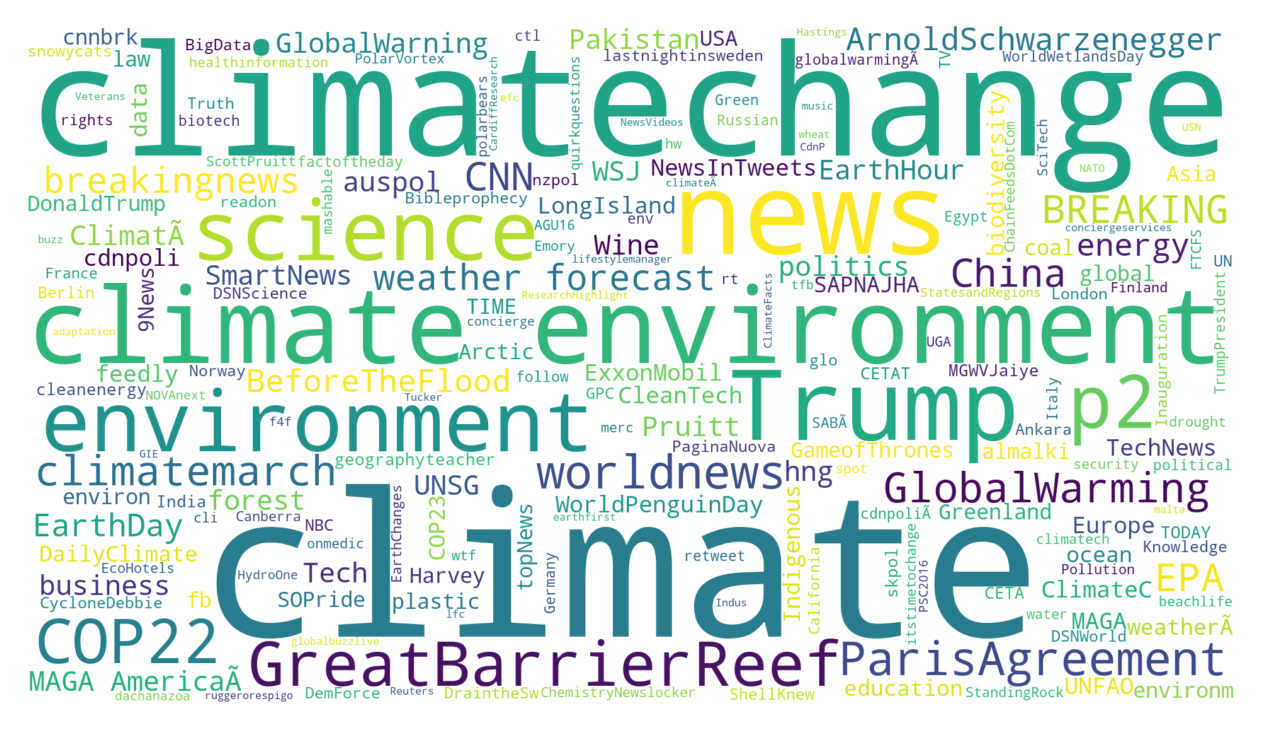

In [91]:
# Wordcloud for the hashtags:News
corpus = re.sub("climate change", ''," ".join(tweet.strip() for tweet in working_df['hashtags'][working_df['sentiment'] == 'News'] if type(tweet) == str))
wordcloud = WordCloud(font_path='../input/droidsansmonottf/droidsansmono.ttf', background_color="white",
                      width = 1920, height = 1080, colormap="viridis").generate(corpus)

# Displaying the word cloud image:
# plt.title("General Word Cloud")
plt.figure(dpi=260)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Feature Engineering and Selection

#### Feature Extraction

For our *Feature Extraction*, we use CV and TF-IDF. These are tools which will help encode the words as integers or floating point values for use as input to a machine learning algorithm.

CountVectorizer counts the word frequencies, while the TFIDFVectorizer (The term frequency-inverse document frequency) is a weight whose value increases proportionally to count, but is inversely proportional to frequency of the word in the corpus. The TF-IDF weight is a weight often used in information retrieval and text mining. Tf-idf can be successfully used for stop-words filtering in various subject fields including text summarization and classification.

In [ ]:
# Converting the collection of clean messages to a matrix of token counts
corpus = working_df['clean']

vectorizer = CountVectorizer()
count_vectorized = vectorizer.fit_transform(corpus)
#print(vectorizer.get_feature_names())
#print(X.toarray())

In [ ]:
# Converting the collection of clean messages to a matrix of TF-IDF features
data = working_df['clean']

vectorizer=TfidfVectorizer(use_idf=True, max_df=0.95)
vectorized = vectorizer.fit_transform(data)
#print(vectorizer.get_feature_names())
#print(X.toarray())

In some problems the countsvec is better suited for model training in others the tfidf representation is the best choice. We have decided to try them both. Although the two representations are very similar and therefore carry approximately the same information, it could be the case that you will get better precision by using the full set of features(tfidf+counts).

In [ ]:
# Using sparse to train the model using both representations.
import scipy.sparse

# Defining the features as well as the label
X = scipy.sparse.hstack([vectorized, count_vectorized])
y = working_df['sentiment']

# Model Selection

Below we import some of the models that we will be training:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

## Training with imbalanced data

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the previously defined features and label of your dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# Creating a list of all the models to train
algs = [LogisticRegression(random_state = 5), SVC(kernel = 'linear', random_state = 5), SVC(kernel = 'rbf', random_state = 5)
        ,MultinomialNB(), KNeighborsClassifier(), DecisionTreeClassifier(max_depth=6),RandomForestClassifier()]

In [ ]:
# Fitting models onto the training data and predicting.
for i in range(0, len(algs)):
    text_clf = Pipeline([('clf', algs[i])])
    ##lowercase = True,stop_words='english', ngram_range=(1, 2), analyzer='word',max_df = 0.8
    text_clf.fit(X_train, y_train)  
    predictions = text_clf.predict(X_test)
    
    
    print(algs[i])
    print(metrics.confusion_matrix(y_test,predictions))
    print(metrics.classification_report(y_test,predictions))
    print('F1_score: ',round(metrics.f1_score(y_test,predictions, average = 'weighted'),3))
    print('-------------------------------------------------------')

##### Best perfoming models

-LogisticRegression()

-SVC()

-N.B: From previous and initial notebook: We have noted that using both represenations improved the KNN perfomance score from *0.328 to 0.559* while the DecisionTreeClassifier score went from *0.559 to 0.488*.

### Balancing the classes

#### Class size to up/down sample

Resampling is a process which involves changing the frequency of the observations. Below we apply it to assess whether or not it will improve our training. This process also serves as model tuning as we will be using a define resampling strategy while taking note of performance measure.


In [ ]:
data = train.copy()

In [ ]:
# importing the module and creating a resampling variable
from sklearn.utils import resample
class_size = int(len(data[data['sentiment']==1])/2)

In [ ]:
# seperating the four classes
class_1 = data[data['sentiment']==-1]
class_2 = data[data['sentiment']==0]
class_3 = data[data['sentiment']==1]
class_4 = data[data['sentiment']==2]

#### Up-sampling

 Here we increase the frequency of the samples.

In [ ]:
# upsampling classes 1, 2, and 4 & downsampling class 3
class_1_up = resample(class_1,replace=True,n_samples=class_size, random_state=27)
class_2_up = resample(class_2,replace=True,n_samples=class_size, random_state=27)
class_4_up = resample(class_4,replace=True,n_samples=class_size, random_state=27)
class_3_down = resample(class_3,replace=False,n_samples=class_size, random_state=27)

In [ ]:
# Creating a new DataFrame out of the balanced bata
res_df = pd.concat([class_1_up, class_2_up, class_4_up,class_3_down])

In [ ]:
# Checking if data has been well-balanced
sns.countplot(x = res_df['sentiment'], data = data, palette='PRGn')
plt.show()

The equal distribution of classes as shown on the count plot, confirms that classes are now balanced.

## Training with balanced data

In [ ]:
# Defining the features as well as the label
X1 = res_df['message']
X_res = X1.apply(cleaner)
y_res = res_df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=42)

In [ ]:
# Fitting models onto the training data and predicting.
for i in range(0, len(algs)):
    text_clf = Pipeline([('count_vec', CountVectorizer(lowercase = True, ngram_range=(1, 2), analyzer='word')),
                         ('clf', algs[i]),])
    text_clf.fit(X_train, y_train)  
    predictions = text_clf.predict(X_test)
    
    
    print(algs[i])
    print(metrics.confusion_matrix(y_test,predictions))
    print(metrics.classification_report(y_test,predictions))
    print('F1_score: ',round(metrics.f1_score(y_test,predictions, average = 'weighted'),3))
    print('-------------------------------------------------------')

##### Best perfoming models

Most of the models scored F1_score above 0.80 

-LogisticRegression()

-SVC()

-MultinomialNB()

-RandomForestClassifier()

while KNN and DecisonTreeClassifier were *0.52 and 0.393* repectively which is not an improved of the score from models trained with unbalanced data.

# Model Evaluation

Accuracy is not always the best metric to use when evaluating imbalanced datasets as it can be very misleading. Metrics that can provide better insight include:

1. Confusion Matrix: table shows correct predictions and types of incorrect predictions.
2. Precision: the number of true positives divided by all positive predictions. 
3. Recall: the number of true positives divided by the number of positive values in the test data. 
4. F1: Score: the weighted average of precision and recall.


In [ ]:
# Extracting a confusion matrix from the results of balanced data
from sklearn import metrics
print(metrics.confusion_matrix(y_test, predictions))

There is also a Classification report which is used to measure the quality of predictions from a classification algorithm. How many predictions are True and how many are False. More specifically, True Positives, False Positives, True negatives and False Negatives are used to predict the metrics of a classification report as shown below.

In [ ]:
# Extracting a classification report from the balanced data
print(metrics.classification_report(y_test, predictions))

All these metrices were included and accounted for in the reports of our models fitted. Additionally, resampling as an approach to model tuning really improved the accuary of our models.

# Conclusion

The are possibilities of obtaining better results using parameter tuning and better preprocessing techninques. We commit to continue conducting research into discovering and training models that would yiled optimal results. The insights garned from the EDA as well as model evaluation will be useful in providing stakeholders that are interested in climate change and related policies understand the distribution of sentiments around the issue.

**Recommendations for fututre Machine Learning:**
The objective of parameter tuning is to find the optimum value for each parameter to improve the accuracy of the model. Tuning the these parameters requires a good understanding of these meaning and their individual impact on model which can be unpacked through a thorough EDA.

Below are some other approaches that can be considered for model tuning:
- Grid Search method: an exhaustive search (blind search/unguided search) over a manually specified subset of the hyperparameter space. This method is a computationally expensive option but guaranteed to find the best combination in your specified grid.

- Informed Search method: In informed search, each iteration learns from the last, the results of one model helps creating the next model.

- Random Search method: a simple alternative and similar to the grid search method but the grid is randomly selected. This method (also blind search/unguided search) is faster at getting reasonable model but will not get the best in your grid.

# References

1. Comet Starter Notebook: 
https://athena.explore-datascience.net/student/content/pre-processing-view/38/100/1772

2. Building a Twitter Sentiment-Analysis App Using Streamlit
https://medium.com/analytics-vidhya/building-a-twitter-sentiment-analysis-app-using-streamlit-d16e9f5591f8

3. Comprehensive Hands on Guide to Twitter Sentiment Analysis with dataset and code
https://www.analyticsvidhya.com/blog/2018/07/hands-on-sentiment-analysis-dataset-python/

4. 10 OF THE BEST TWEETS ON CLIMATE CHANGE | AUGUST 08, 2018 | 5:21 AM
https://www.climaterealityproject.org/blog/10-best-tweets-climate-change

5. Media Bias Detection using Deep Learning Libraries in Python
https://towardsdatascience.com/media-bias-detection-using-deep-learning-libraries-in-python-44efef4918d1

6. Does it make sense to use both countvectorizer and tfidfvectorizer as feature vectors for text clustering with KMeans?
https://stackoverflow.com/questions/27496014/does-it-make-sense-to-use-both-countvectorizer-and-tfidfvectorizer-as-feature-ve

7. Reccurent Neural Networks (RNN), the following video from MIT is an excellent resource:
https://www.youtube.com/watch?v=SEnXr6v2ifU

8. Cross Validation and Grid Search for Model Selection in Python
https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/

9. Tuning Hyperparameters
https://mlr.mlr-org.com/articles/tutorial/tune.html

10. Resampling
https://mlr.mlr-org.com/articles/tutorial/resample.html